In [14]:
# from https://livebook.manning.com/#!/book/deep-learning-with-python/chapter-2/41

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from keras import models
from keras import layers
import pandas as pd
import random
random.seed(1234)

import matplotlib.pyplot as plt


In [2]:
network = models.Sequential()

# Four dense,fully connected layers
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Fifth layer using softmax
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
history_training = network.fit(train_images, train_labels, epochs=10, batch_size=512)


Epoch 1/10
60000/60000 [==============================] - 19s 315us/step - loss: 14.1154 - acc: 0.1065
Epoch 2/10
60000/60000 [==============================] - 17s 275us/step - loss: 14.5200 - acc: 0.0991
Epoch 3/10
60000/60000 [==============================] - 17s 275us/step - loss: 14.5200 - acc: 0.0991
Epoch 4/10
60000/60000 [==============================] - 17s 276us/step - loss: 14.5200 - acc: 0.0992
Epoch 5/10
60000/60000 [==============================] - 17s 279us/step - loss: 14.5200 - acc: 0.0991
Epoch 6/10
60000/60000 [==============================] - 18s 304us/step - loss: 14.5200 - acc: 0.0992
Epoch 7/10
60000/60000 [==============================] - 17s 287us/step - loss: 14.5200 - acc: 0.0991
Epoch 8/10
60000/60000 [==============================] - 16s 274us/step - loss: 14.5200 - acc: 0.0992
Epoch 9/10
60000/60000 [==============================] - 17s 281us/step - loss: 14.5200 - acc: 0.0992
Epoch 10/10
60000/60000 [==============================] - 17s 282us/step

In [4]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 2s 182us/step
test_acc: 0.1009


In [13]:
history_training.history

{'acc': [0.10651666666666666,
  0.09914999999602636,
  0.09914999999602636,
  0.0991500000004967,
  0.09914999999602636,
  0.09915,
  0.09914999999205272,
  0.09915000000794728,
  0.09915000000397364,
  0.09915000000397364],
 'loss': [14.115412140401205,
  14.519992173258464,
  14.519992181396484,
  14.519992170715332,
  14.519992197672526,
  14.519992171223958,
  14.519992225646973,
  14.51999214223226,
  14.519992162577312,
  14.519992142740886]}

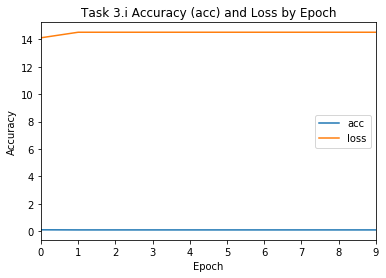

In [21]:
df = pd.DataFrame(history_training.history)
df.plot()
plt.title("Task 3.i Accuracy (acc) and Loss by Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch");

In [22]:
best_model = 0 # for now, need to figure way to identify

print("At epoch {} the model's performance degrades based on the validation set.".format(best_model))

At epoch 0 the model's performance degrades based on the validation set.
